# Stationary Test

By Alberto Valdés 

**Mail 1:** anvaldes@uc.cl 

**Mail 2:** alberto.valdes.gonzalez.96@gmail.com

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import time
import math
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import image as mpimg

In [3]:
def display_img(name, a, b):
    plt.figure(figsize = (a, b))
    image = mpimg.imread(name)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

In [4]:
start = time.time()

# Augmented Dickey-Fuller Test

$ H_0: $ If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.

$ H_a: $ The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

**Criteria**

If $ p_{value} > 0.5 $ we cant reject null hypotesis thus time series is non stationary.

If $ p_{value} \leq 0.5 $ we reject the null hypotesis thus time series is stationary.


### Important Note

Many times the time serie is not stationary but if we remove the **trend component** or **other component** and then the time serie is stationary.

In [5]:
df_1 = pd.read_csv('AirPassengers.csv')
df_2 = pd.read_csv('daily-total-female-births-CA.csv')
df_3 = pd.read_csv('Temp.csv', skiprows = [3652])

In [6]:
df_1 = df_1.rename(columns = {'Month': 'Time', '#Passengers': 'X_t'})
df_2 = df_2.rename(columns = {'date': 'Time', 'births': 'X_t'})
df_3 = df_3.rename(columns = {'Date': 'Time', 'Daily minimum temperatures in Melbourne, Australia, 1981-1990': 'X_t'})

In [7]:
df_1['Time'] = pd.to_datetime(df_1['Time'])
df_2['Time'] = pd.to_datetime(df_2['Time'])
df_3['Time'] = pd.to_datetime(df_3['Time'])

In [8]:
def transform_date(date):

    try:

        new_date = date.year + (date.month - 1)/12 + date.day/365

        return new_date
    
    except:

        return float('nan')

In [9]:
def transform_value(value):

    try:

        return float(value)
    
    except:

        return float('nan')

In [10]:
df_1['Time'] = df_1['Time'].map(lambda x: transform_date(x))
df_2['Time'] = df_2['Time'].map(lambda x: transform_date(x))
df_3['Time'] = df_3['Time'].map(lambda x: transform_date(x))

In [11]:
df_1['X_t'] = df_1['X_t'].map(lambda x: transform_value(x))
df_2['X_t'] = df_2['X_t'].map(lambda x: transform_value(x))
df_3['X_t'] = df_3['X_t'].map(lambda x: transform_value(x))

In [12]:
df_1 = df_1.dropna()
df_2 = df_2.dropna()
df_3 = df_3.dropna()

In [13]:
from statsmodels.tsa.stattools import adfuller

### 1. Airpassengers

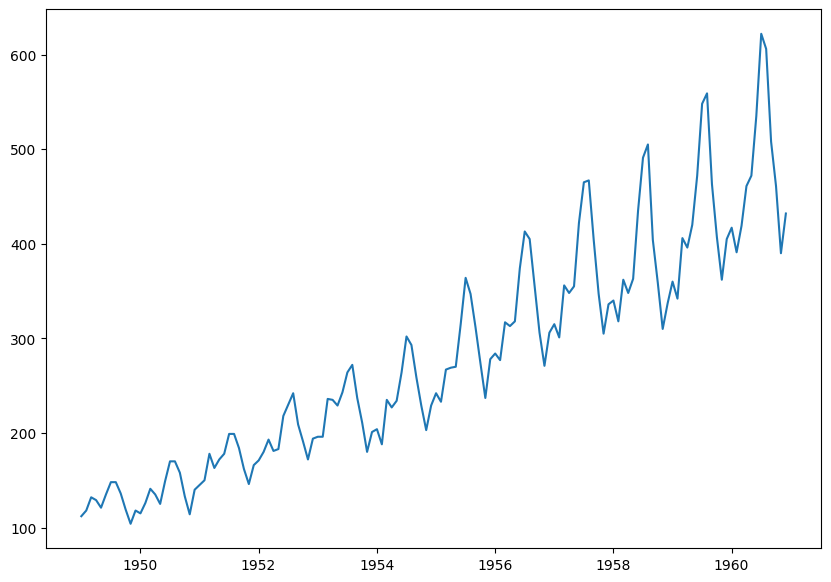

In [14]:
plt.figure(figsize = (10, 7))
plt.plot(df_1['Time'], df_1['X_t'])
plt.show()

In [15]:
result_1 = adfuller(df_1['X_t'].values)

In [16]:
print('ADF Statistic: %f' % result_1[0])
print('p-value: %f' % result_1[1])
print('Critical Values:')
for key, value in result_1[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


**Comment:** The serie is not stationary.

We going to propose the next model and then test the noise. First of all we goint to predict the trend.

$ M(t) = \alpha_0 + \alpha_1 \cdot t $

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
reg = LinearRegression().fit(df_1[['Time']], df_1['X_t'])

In [19]:
df_1['M_t'] = reg.predict(df_1[['Time']])

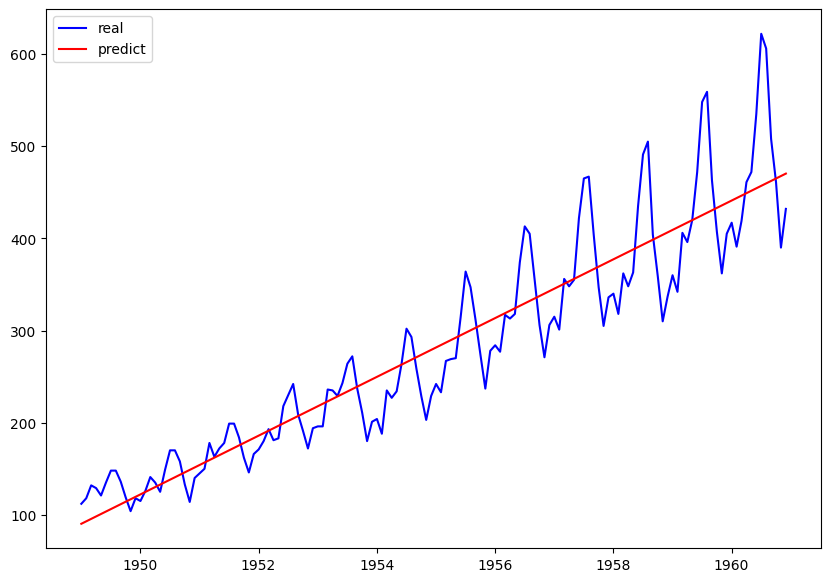

In [20]:
plt.figure(figsize = (10, 7))
plt.plot(df_1['Time'], df_1['X_t'], color = 'blue', label = 'real')
plt.plot(df_1['Time'], df_1['M_t'], color = 'red', label = 'predict')
plt.legend()
plt.show()

In [21]:
df_1['second_X_t'] = df_1['X_t']/df_1['M_t']

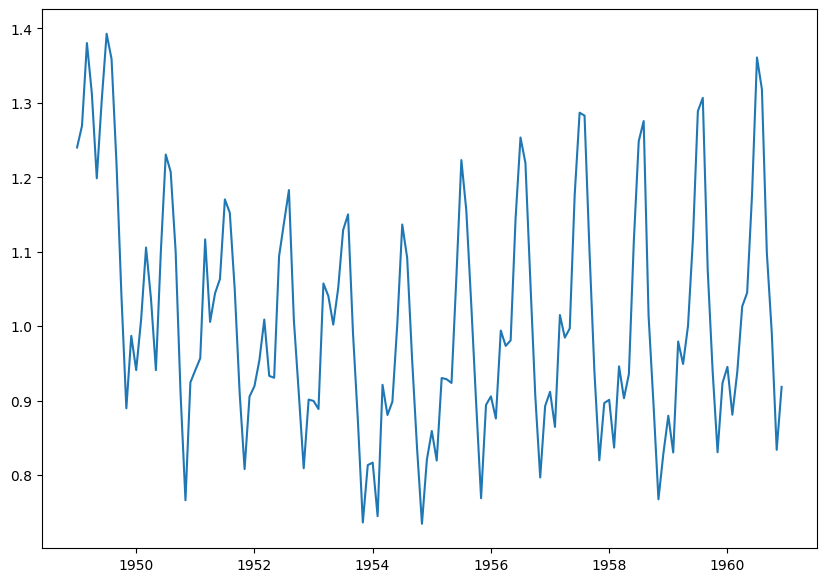

In [22]:
plt.figure(figsize = (10, 7))
plt.plot(df_1['Time'], df_1['second_X_t'])
plt.show()

We going to propose the next model:

$ S(t) = \alpha_0 + \alpha_1 \cdot cos \left( 2 \pi \cdot t \right) + \alpha_2 \cdot sin \left( 2 \pi \cdot t \right) + \alpha_3 \cdot cos \left( 4 \pi \cdot t \right) + \alpha_4 \cdot sin \left( 4 \pi \cdot t \right) $

$ + \alpha_5 \cdot t \cdot cos \left( 2 \pi \cdot t \right) + \alpha_6 \cdot t \cdot sin \left( 2 \pi \cdot t \right) + \alpha_7 \cdot t \cdot cos \left( 4 \pi \cdot t \right) + \alpha_8 \cdot t \cdot sin \left( 4 \pi \cdot t \right) $

In [23]:
df_1['cos'] = np.cos(df_1['Time']*2*math.pi)
df_1['sin'] = np.sin(df_1['Time']*2*math.pi)
df_1['cos_2'] = np.cos(df_1['Time']*4*math.pi)
df_1['sin_2'] = np.sin(df_1['Time']*4*math.pi)
df_1['cos_t'] = df_1['Time']*np.cos(df_1['Time']*2*math.pi)
df_1['sin_t'] = df_1['Time']*np.sin(df_1['Time']*2*math.pi)
df_1['cos_2_t'] = df_1['Time']*np.cos(df_1['Time']*4*math.pi)
df_1['sin_2_t'] = df_1['Time']*np.sin(df_1['Time']*4*math.pi)

In [24]:
reg = LinearRegression().fit(df_1[['cos', 'sin', 'cos_2', 'sin_2', 'cos_t', 'sin_t', 'cos_2_t', 'sin_2_t']], df_1['second_X_t'])

In [25]:
df_1['S_t'] = reg.predict(df_1[['cos', 'sin', 'cos_2', 'sin_2', 'cos_t', 'sin_t', 'cos_2_t', 'sin_2_t']])

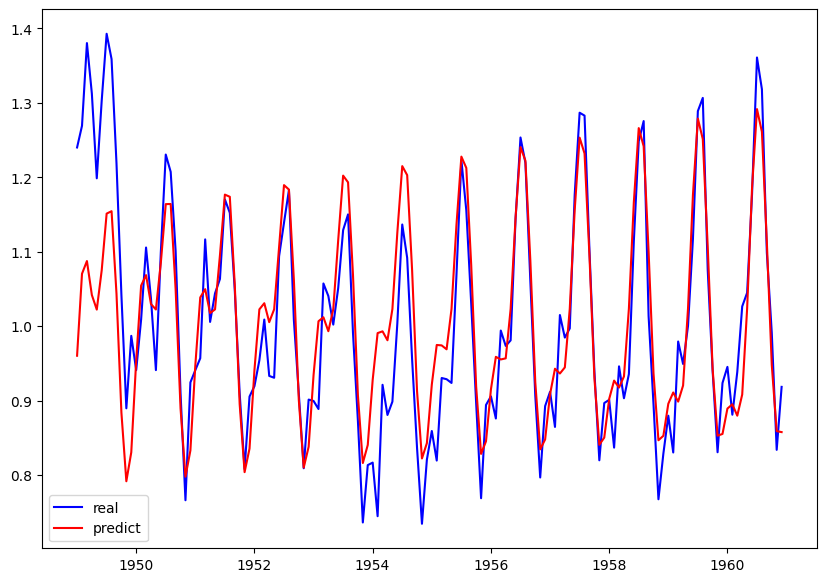

In [26]:
plt.figure(figsize = (10, 7))
plt.plot(df_1['Time'], df_1['second_X_t'], color = 'blue', label = 'real')
plt.plot(df_1['Time'], df_1['S_t'], color = 'red', label = 'predict')
plt.legend()
plt.show()

In [27]:
df_1['predict'] = df_1['M_t']*df_1['S_t']

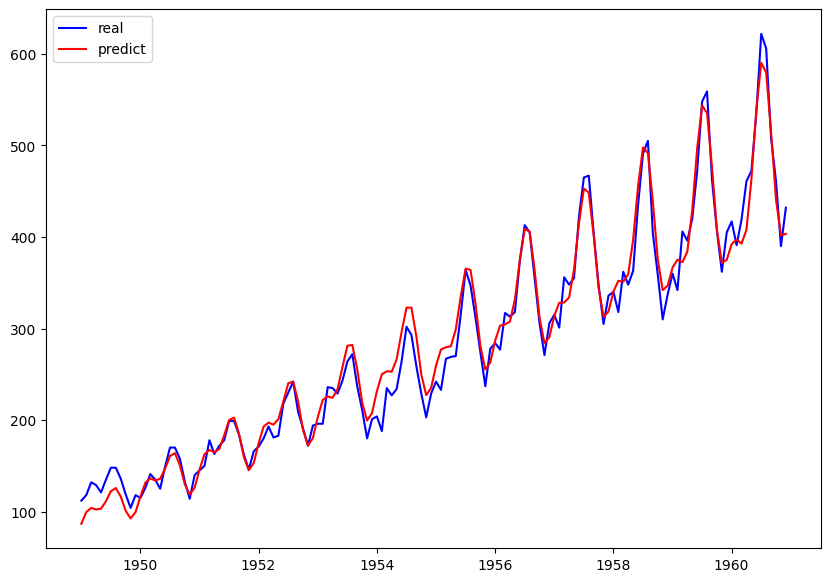

In [28]:
plt.figure(figsize = (10, 7))
plt.plot(df_1['Time'], df_1['X_t'], color = 'blue', label = 'real')
plt.plot(df_1['Time'], df_1['predict'], color = 'red', label = 'predict')
plt.legend()
plt.show()

In [29]:
df_1['N_t'] = df_1['X_t'] - df_1['predict']

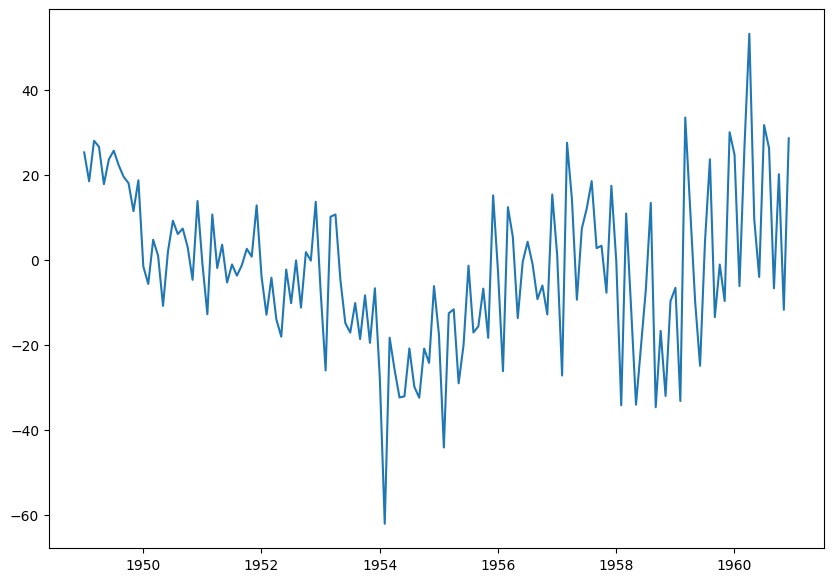

In [30]:
plt.figure(figsize = (10, 7))
plt.plot(df_1['Time'], df_1['N_t'])
plt.show()

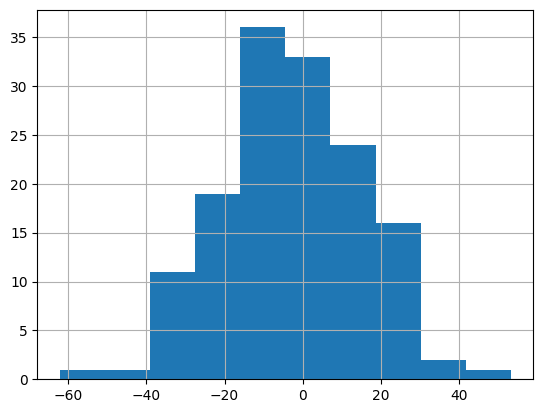

In [31]:
df_1['N_t'].hist()
plt.show()

In [32]:
result_1_N_t = adfuller(df_1['N_t'].values)

In [33]:
print('ADF Statistic: %f' % result_1_N_t[0])
print('p-value: %f' % result_1_N_t[1])
print('Critical Values:')
for key, value in result_1_N_t[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.966047
p-value: 0.301656
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


**Comment:** We can see the time serie is not stationary but is "more stationary" that the previous version.

### 2. Female Births

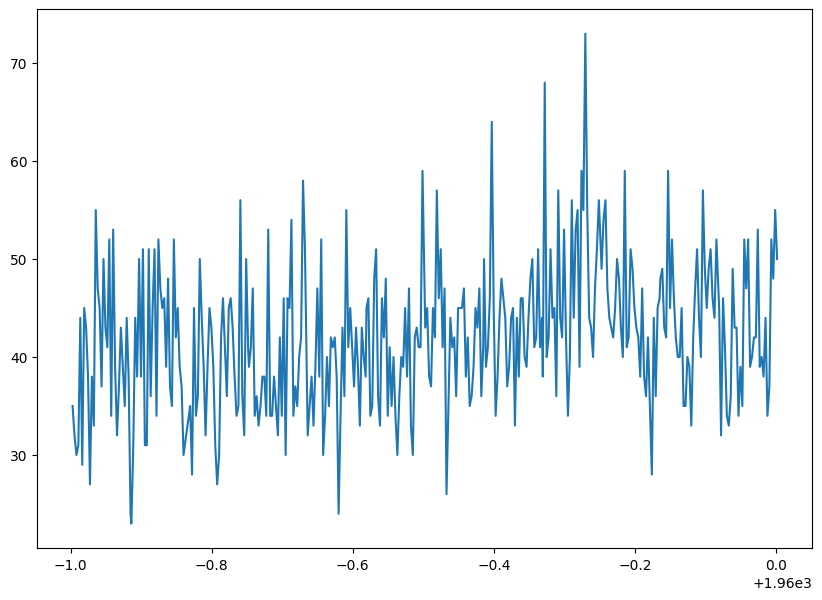

In [34]:
plt.figure(figsize = (10, 7))
plt.plot(df_2['Time'], df_2['X_t'])
plt.show()

In [35]:
result_2 = adfuller(df_2['X_t'].values)

In [36]:
print('ADF Statistic: %f' % result_2[0])
print('p-value: %f' % result_2[1])
print('Critical Values:')
for key, value in result_2[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.808291
p-value: 0.000052
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


**Comment:** The time serie is stationary.

### 3. Temperature

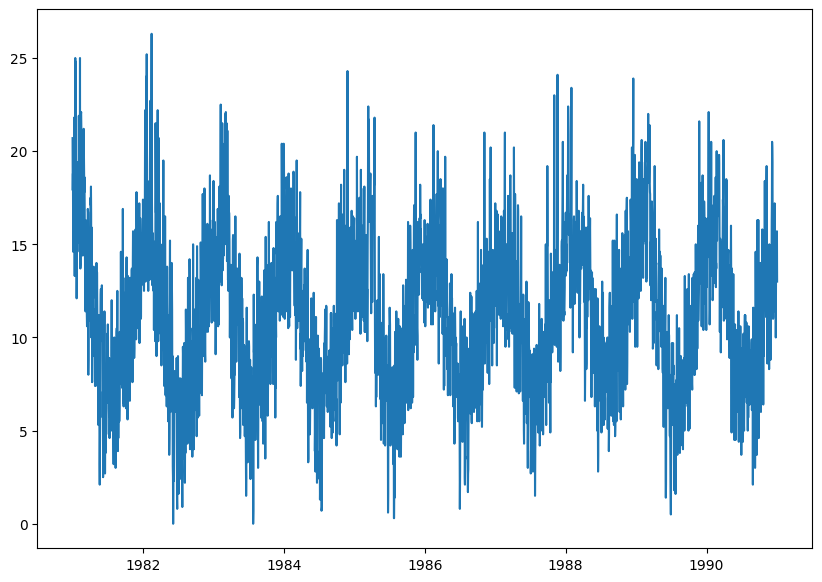

In [37]:
plt.figure(figsize = (10, 7))
plt.plot(df_3['Time'], df_3['X_t'])
plt.show()

In [38]:
result_3 = adfuller(df_3['X_t'].values)

In [39]:
print('ADF Statistic: %f' % result_3[0])
print('p-value: %f' % result_3[1])
print('Critical Values:')
for key, value in result_3[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.444653
p-value: 0.000247
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


**Comment:** The time serie is stationary.

Now we going to test the noise of a prediction.

In [40]:
df_3['cos'] = np.cos(df_3['Time']*2*math.pi)
df_3['sin'] = np.sin(df_3['Time']*2*math.pi)

In [41]:
reg = LinearRegression().fit(df_3[['cos', 'sin']], df_3['X_t'])

In [42]:
df_3['S_t'] = reg.predict(df_3[['cos', 'sin']])

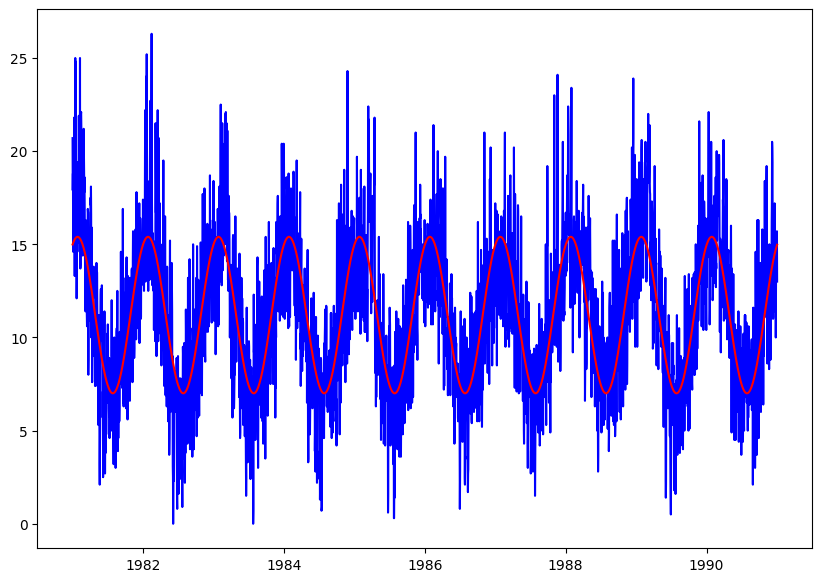

In [43]:
plt.figure(figsize = (10, 7))
plt.plot(df_3['Time'], df_3['X_t'], color = 'blue', label = 'real')
plt.plot(df_3['Time'], df_3['S_t'], color = 'red', label = 'S_t')
plt.show()

In [44]:
df_3['N_t'] = df_3['X_t'] - df_3['S_t']

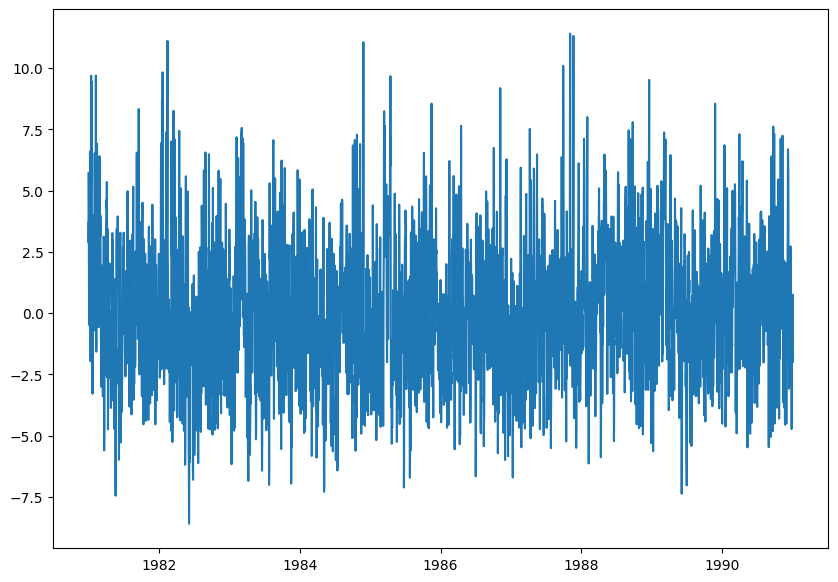

In [45]:
plt.figure(figsize = (10, 7))
plt.plot(df_3['Time'], df_3['N_t'])
plt.show()

[]

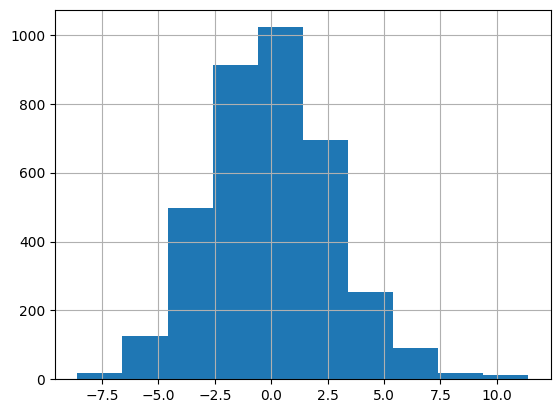

In [46]:
df_3['N_t'].hist()
plt.plot()

In [47]:
result_3 = adfuller(df_3['N_t'].values)

In [48]:
print('ADF Statistic: %f' % result_3[0])
print('p-value: %f' % result_3[1])
print('Critical Values:')
for key, value in result_3[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -17.727998
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


### Time of execution

In [49]:
end = time.time()

In [50]:
delta = (end - start)

hours = int(delta/3600)
mins = int((delta - hours*3600)/60)
segs = int(delta - hours*3600 - mins*60)
print(f'Execute this notebook take us {hours} hours, {mins} minutes and {segs} seconds.')

Execute this notebook take us 0 hours, 0 minutes and 2 seconds.
